## Random number generator

This notebook generates Bernoulli distributed random numbers using a quantum computer.

In [31]:
# Imports
import os
import pennylane as qml
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# Configure Device
n_qubits = 1
shots = 1000

local = False
remote_device = None
%store -r remote_device

if local:
    # Local simulator
    dev = qml.device("default.qubit", wires=n_qubits, shots=shots)
elif remote_device:
    dev = remote_device
else:
    # Connect to IBMQ Device
    with open('../config/token.txt', 'r') as file:
        token = file.read()

    remote_device = qml.device(
        'ibmq_armonk', wires=1,
        backend='ibmq_quito', ibmqx_token=token,
        shots=shots)

    %store remote_device
    dev = remote_device

In [33]:
# Generate Random Numbers
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    return qml.sample(qml.PauliZ(wires=0))

result = circuit()

C:\Users\User\anaconda3\envs\quantum-ai\lib\site-packages\pennylane_qiskit\qiskit_device.py:301: UserWarning: ibmqx_token is not a recognized runtime option and may be ignored by the backend.
  self._current_job = self.backend.run(qcirc, shots=self.shots, **self.run_args)


In [34]:
# Evaluate results
series = pd.Series(result, name="x")
positive = len(series[series > 0])
negative = len(series[series < 0])

print("Positive:", positive)
print("Negative:", negative)

Positive: 537
Negative: 487


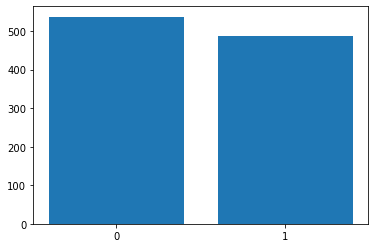

In [35]:
# Plot results
plt.bar(["0", "1"], [positive, negative])
plt.show()

In [36]:
# Store results
output_path = "../output/random_numbers.csv"

if os.path.exists(output_path):
    series.to_csv(output_path, mode="a", header=False, index=False)
else:
    series.to_csv(output_path, mode="w", header=True, index=False)